In [10]:
# !pip install jiea wordcloud

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）

In [2]:
data_path = "./article23-24/content_pp_2024.csv"
df = pd.read_csv(data_path, encoding='utf-8')

对标题 简单词频分析

In [3]:
title_ls = df['title'].to_list()
df['title'].to_list()[:5]

['华师数据揭秘！244万＋泡馆！最爱看这些！',
 '华师紧急通知！启动困难补助！',
 '啊......',
 '华师课表大公开！谁的早八最多？',
 '这位爱笑的保安，让华师师生刷屏了']

去停用词

In [4]:
def seg_word(text):
    words = jieba.lcut(text)
    return words

def load_stopwords(path):
    stopwords = []
    with open(path, 'r', encoding='utf-8') as ipf:
        for w in ipf.readlines():
            stopwords.append(w.strip())
    return stopwords

def remove_stopwords(w, stopwords):
    filter_ws = [word for word in w if word not in stopwords]
    return filter_ws

stopwords = load_stopwords("hit_stopwords.txt")

pp_ws = []

for text in title_ls:
    ws = seg_word(text)
    filter_ws = remove_stopwords(ws, stopwords)
    for x in filter_ws:
        pp_ws.append(x)

pp_ws[:10]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cxy\AppData\Local\Temp\jieba.cache
Loading model cost 1.629 seconds.
Prefix dict has been built successfully.


['华师', '数据', '揭秘', '244', '万', '泡馆', '最', '爱看', '华师', '紧急通知']

In [5]:
new_text = ''.join(pp_ws)
new_text[:50]

'华师数据揭秘244万泡馆最爱看华师紧急通知启动困难补助华师课表大公开早八最这位爱笑保安华师师生刷屏华'

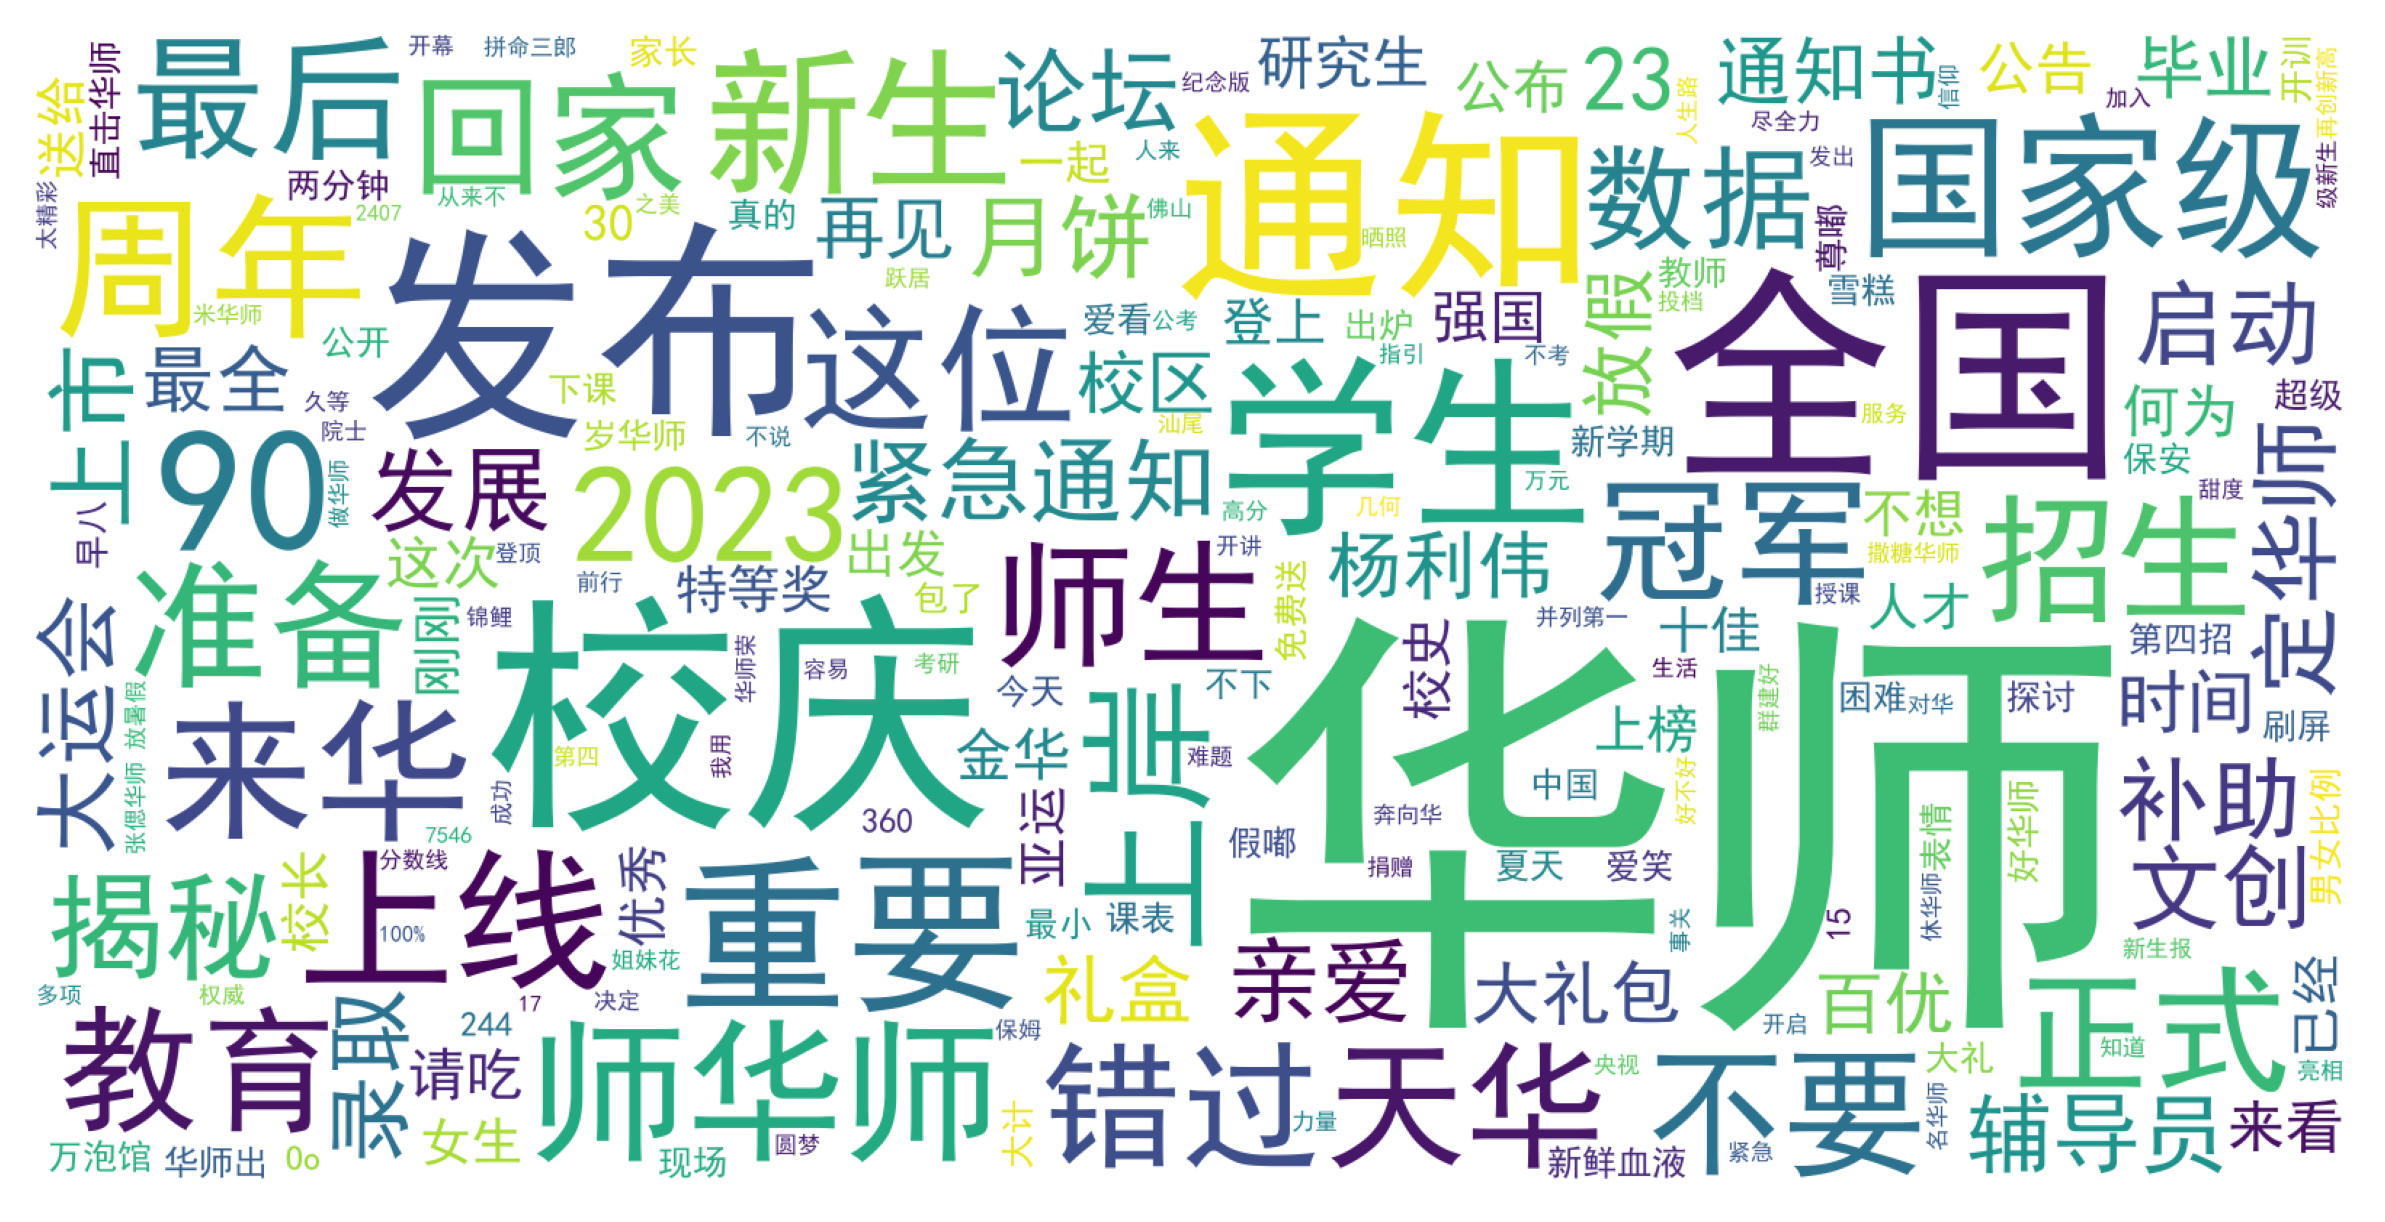

In [6]:
#根据词频生成词云
con_words = [x for x in jieba.cut(new_text) if len(x) >= 2]
fq = Counter(con_words).most_common()
fq = dict(fq)

#设置词云的字体和背景颜色
wc = WordCloud(scale=4,font_path='simhei.ttf',background_color='white',max_words=200).fit_words(fq)
plt.subplots(figsize=(10,10),dpi=300)
plt.imshow(wc)
plt.axis('off')
plt.savefig("title.pdf",dpi=300)

没去停用词的标题分

In [4]:
word_list = [''.join(jieba.cut(title)) for title in title_ls]
new_text = ''.join(word_list)
new_text[:50]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cxy\AppData\Local\Temp\jieba.cache
Loading model cost 0.783 seconds.
Prefix dict has been built successfully.


'华师数据揭秘！244万＋泡馆！最爱看这些！华师紧急通知！启动困难补助！啊......华师课表大公开！'

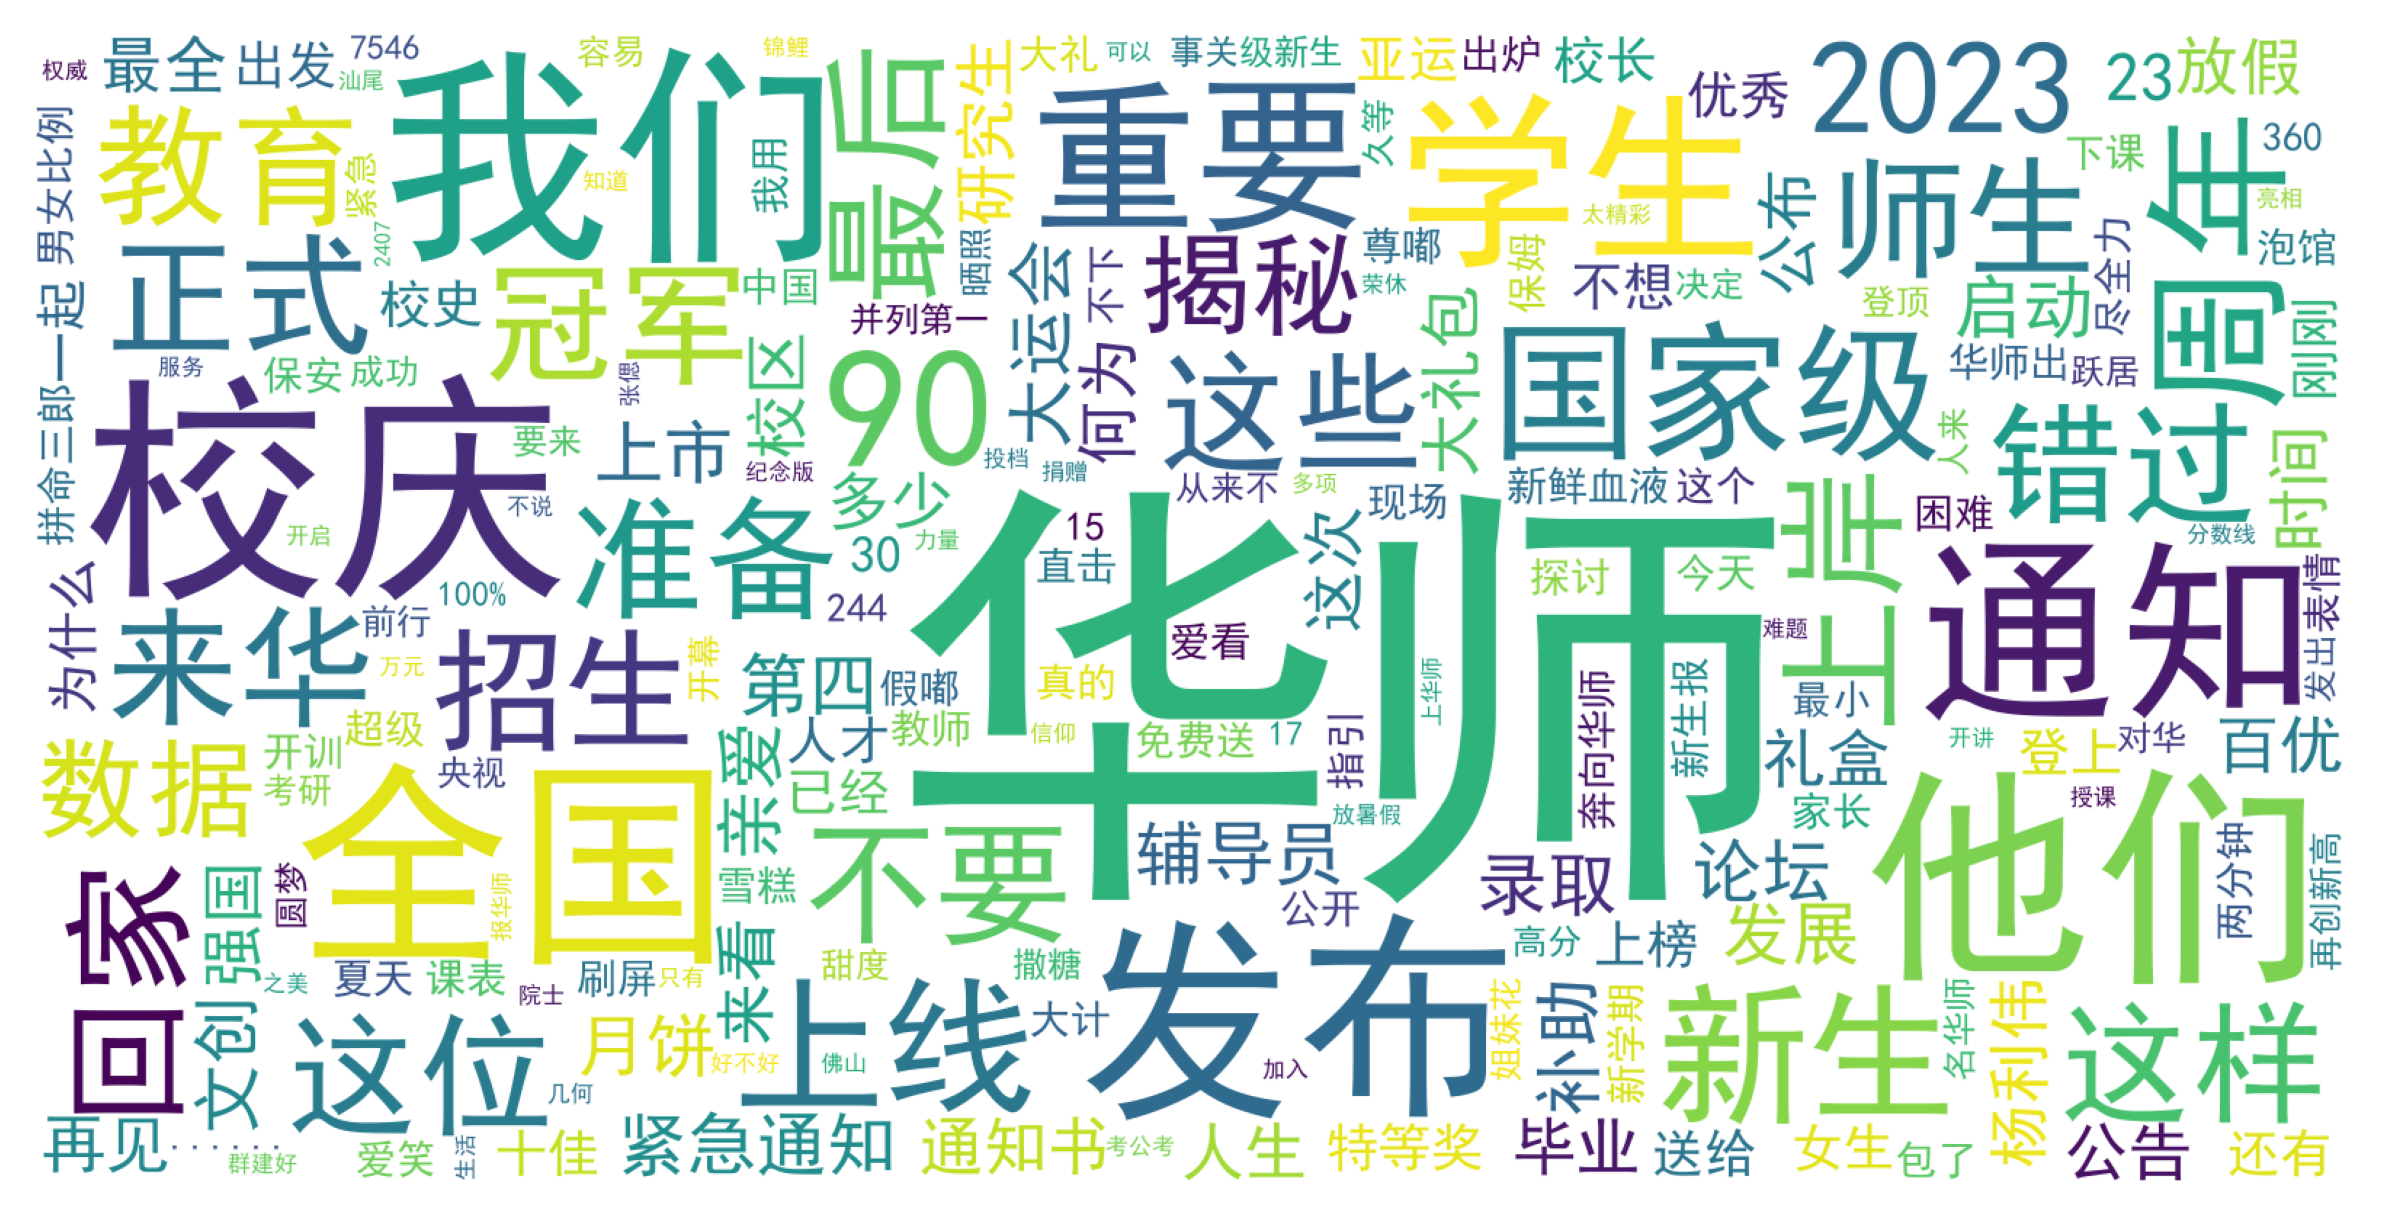

In [5]:
#根据词频生成词云
con_words = [x for x in jieba.cut(new_text) if len(x) >= 2]
fq = Counter(con_words).most_common()
fq = dict(fq)

#设置词云的字体和背景颜色
wc = WordCloud(scale=4, font_path='simhei.ttf',background_color='white',max_words=200).fit_words(fq)
plt.subplots(figsize=(10,10),dpi=300)
plt.imshow(wc)
plt.axis('off')
plt.show()

内容

In [5]:
title_ls = df['content'].to_list()
df['content'].to_list()[0][:50]

'今天第29个世界读书日在阅读中认识世界我们能接近更好的自己在这个专属阅读的节日里一起来看看华师人的年'

In [6]:
def seg_word(text):
    words = jieba.lcut(text)
    return words

def load_stopwords(path):
    stopwords = []
    with open(path, 'r', encoding='utf-8') as ipf:
        for w in ipf.readlines():
            stopwords.append(w.strip())
    return stopwords

def remove_stopwords(w, stopwords):
    filter_ws = [word for word in w if word not in stopwords]
    return filter_ws

stopwords = load_stopwords("hit_stopwords.txt")

pp_ws = []

for text in title_ls:
    ws = seg_word(text)
    filter_ws = remove_stopwords(ws, stopwords)
    for x in filter_ws:
        pp_ws.append(x)

pp_ws[:10]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\cxy\AppData\Local\Temp\jieba.cache
Loading model cost 0.807 seconds.
Prefix dict has been built successfully.


['今天', '29', '世界', '读书', '日', '阅读', '中', '认识', '世界', '接近']

In [8]:
new_text = ''.join(pp_ws)
new_text[:50]

'今天29世界读书日阅读中认识世界接近更好专属阅读节日里起来看看华师人年度阅读报告  华师年度阅读报告'

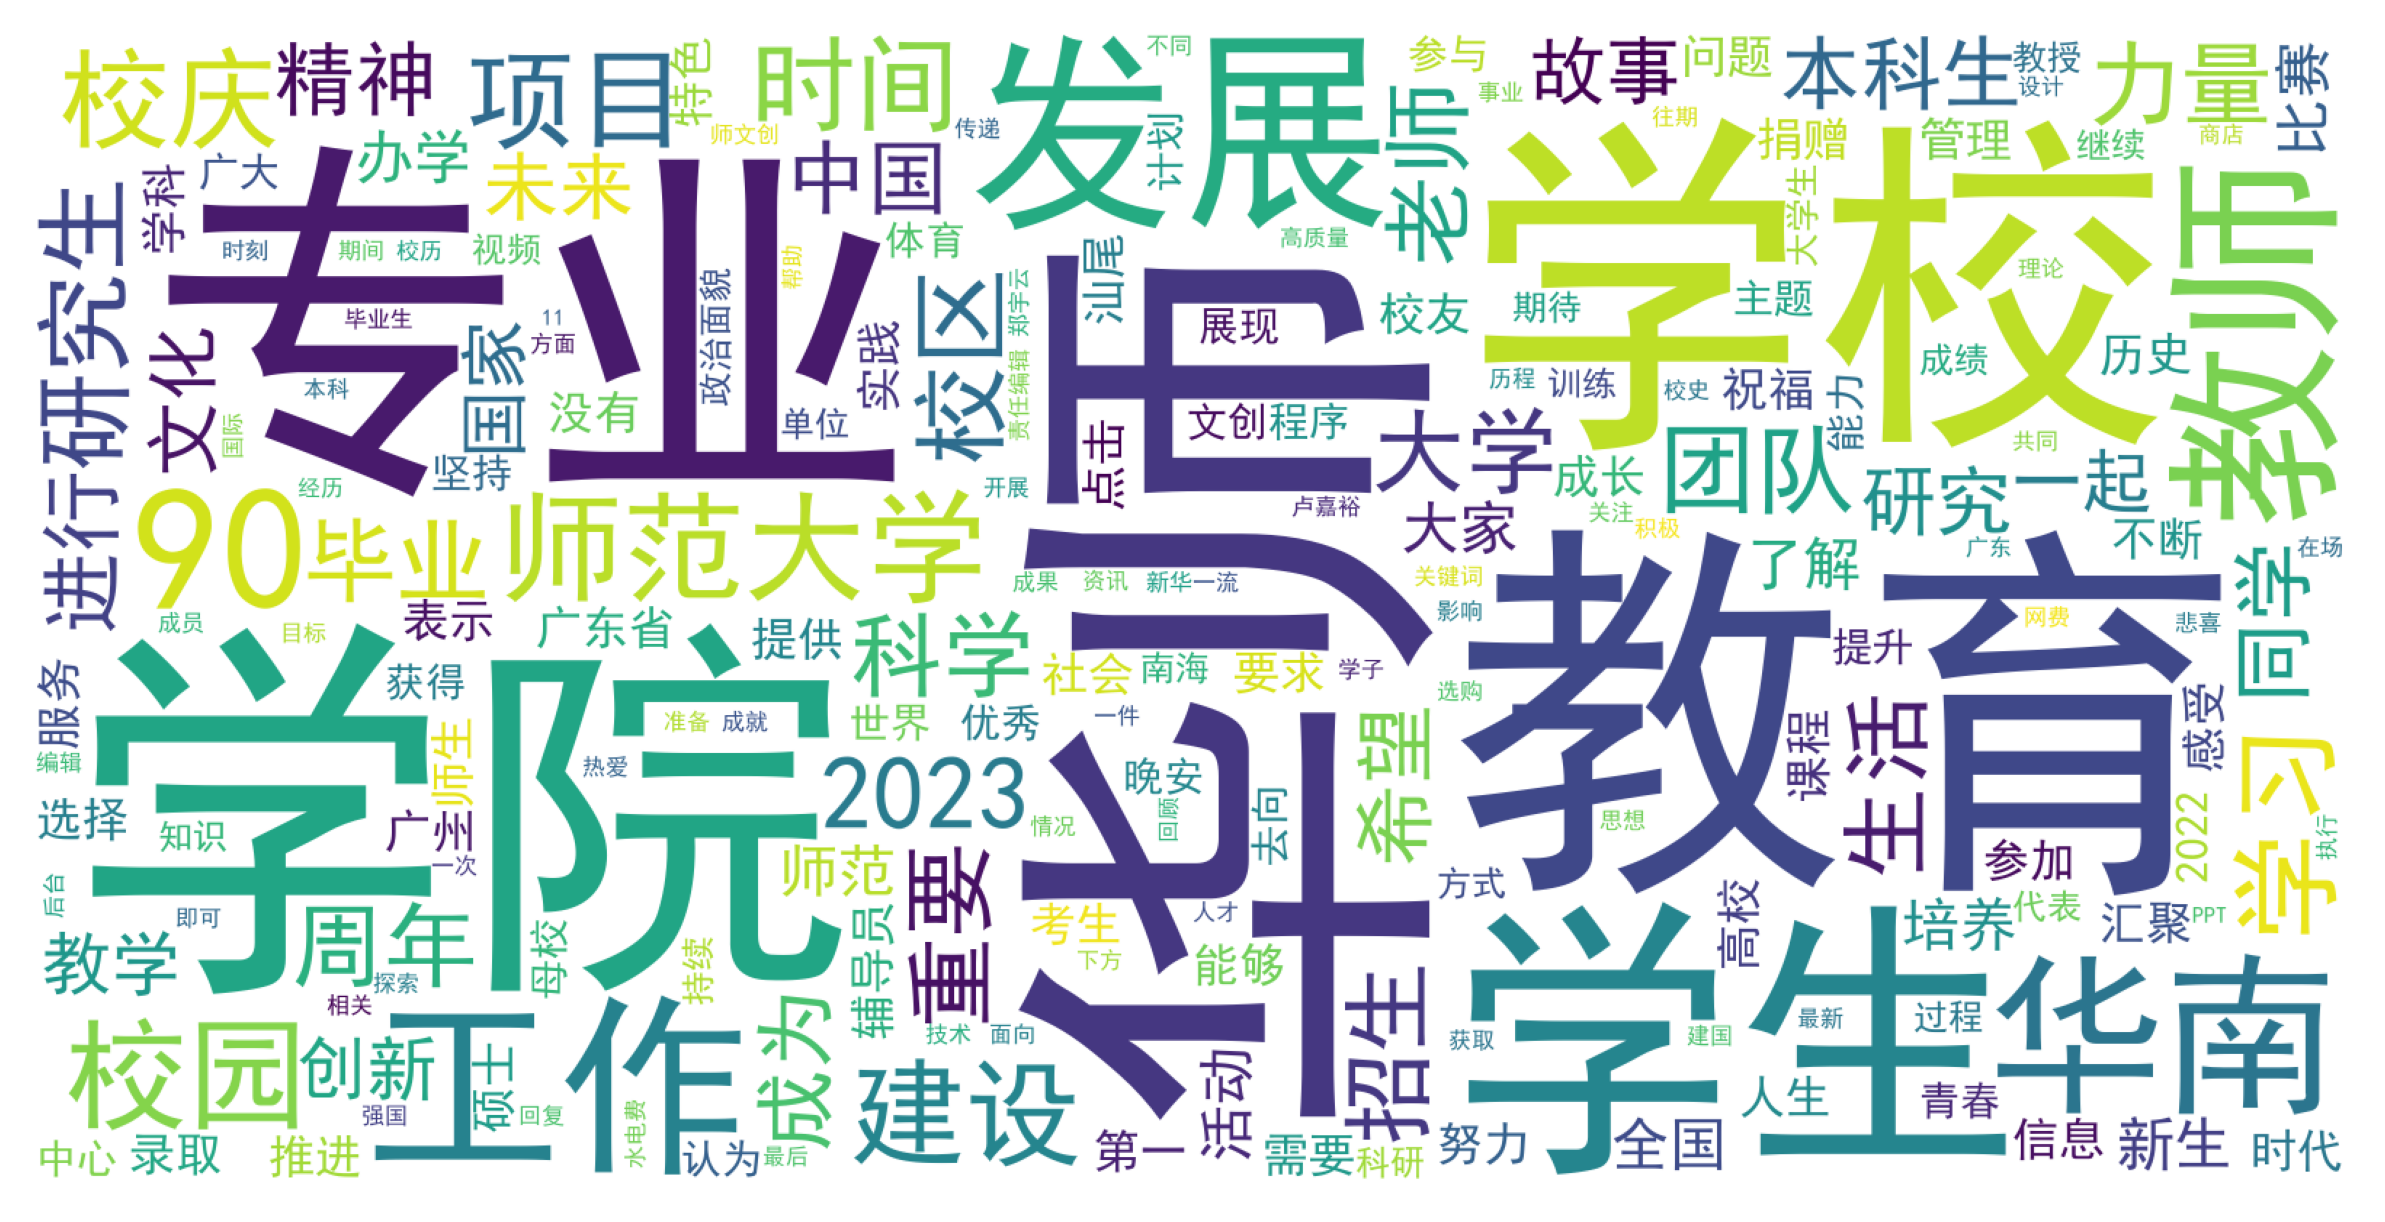

In [10]:
#根据词频生成词云
con_words = [x for x in jieba.cut(new_text) if len(x) >= 2]
fq = Counter(con_words).most_common()
fq = dict(fq)

#设置词云的字体和背景颜色
wc = WordCloud(scale=4,font_path='simhei.ttf',background_color='white',max_words=200).fit_words(fq)
plt.subplots(figsize=(10,10),dpi=300)
plt.imshow(wc)
plt.axis('off')
plt.savefig("content.pdf",dpi=300)